### Question 8.1 

$ E^{'}=k_3ES+k_2ES-k_1E\times S $

$ S^{'}=k_2ES-k_1E\times S $

$ES^{'}=k_1E\times S-k_2ES-k_3ES $

$P^{'}=k_3ES$

### Qesution 8.2

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def ESP(y,  Kp):
    E=y[0]
    S=y[1]
    ES=y[2]
    P=y[3]
    Ea=Kp[2]*ES+Kp[1]*ES-Kp[0]*E*S
    Sa=Kp[1]*ES-Kp[0]*E*S
    ESa=Kp[0]*E*S-Kp[1]*ES-Kp[2]*ES
    Pa=Kp[2]*ES
    res=np.array([Ea,Sa,ESa,Pa])
    return res

In [6]:
def RK4(y0,dt,Nt):# E ,S ,ES ,P
    y=np.zeros((y0.shape[0],Nt),dtype=np.float)
    y[:,0]=y0
    Kp=[100,600,150]
    for i in range(0,Nt-1):
        a1=ESP(y[:,i],Kp)
        a2=ESP(y[:,i]+a1*dt/2,Kp)
        a3=ESP(y[:,i]+a2*dt/2,Kp)
        a4=ESP(y[:,i]+a3*dt,Kp)
        y[:,i+1]=y[:,i]+dt/6*(a1+2*a2+2*a3+a4)
    return y

In [7]:
init=[1,10,0,0]
init=np.array(init)

In [30]:
dt=0.001
times=400

In [31]:
res=RK4(init,dt,times)

In [32]:
x=np.linspace(0,4,400)

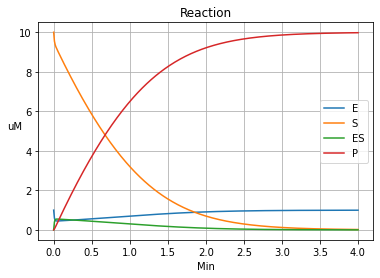

In [33]:
plt.plot(x,res[0,:],label='E')
plt.plot(x,res[1,:],label='S')
plt.plot(x,res[2,:],label='ES')
plt.plot(x,res[3,:],label='P')

plt.title('Reaction')
plt.grid()
plt.ylabel('uM',rotation=0)
plt.xlabel('Min')
plt.legend()
plt.show()

### Question 8.3

In [95]:
init=[1,10,0,0]
init=np.array(init)
dt=0.001
times=400

In [96]:
res=RK4(init,dt,times)

Calculates it's left derivative because Np start with 0.

In [107]:
Np= res[3,:]
Vp=np.zeros((Np.shape[0]-1),dtype=np.float)
for i in range(0,Np.shape[0]-1):
    Vp[i]=(Np[i+1]-Np[i])/Np[i+1]

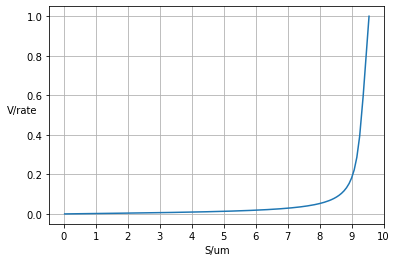

In [108]:
plt.xticks(np.arange(0,11,1))
plt.xlabel('S/um')
plt.ylabel('V/rate',rotation=0)
plt.grid()
plt.plot(res[1,1:],Vp)

In [109]:
max=0
index=0
for i in range(0,399):
    if max<Vp[i]:
        max=Vp[i]
        index=i
print(max,res[1,index+1])

1.0 9.54701001764323


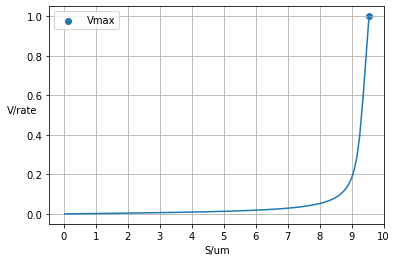

In [110]:
plt.xticks(np.arange(0,11,1))
plt.xlabel('S/um')
plt.ylabel('V/rate',rotation=0)
plt.grid()
plt.scatter(res[1,index+1],max,label='Vmax')
plt.legend()
plt.plot(res[1,1:],Vp)